In [1]:
import numpy as np
import pandas as pd
import statistics
from os import listdir
import pycaret
from pycaret.classification import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
def clustering(data, participants): 
    
    cost = []
    silhouette = []

    for i in range(2, participants):
        kmeans = KMeans(n_clusters = i, max_iter = 500, random_state = 0)
        kmeans.fit_predict(data)
        
        # Calculate Silhoutte Score
        score = silhouette_score(data, kmeans.labels_, metric='euclidean')
        silhouette.append(score)
    
        # Calculates squared error for the clustered points
        cost.append(kmeans.inertia_)    
        
    # Plot the cost against K values
    plt.plot(range(2, participants), cost, color ='g', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    
    # Plot the Silhouette Score against K values
    plt.plot(range(2, participants), silhouette, color ='b', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Silhouette Score")
    plt.show() # clear the plot
    # the point of the elbow is the
    # most optimal value for choosing k

In [3]:
def silhouette(data, clusters):
    kmeans = KMeans(n_clusters = clusters, max_iter = 500, random_state = 0)
    kmeans.fit_predict(data)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')#ax[q-1][mod])#, ax = ax[x%3][y%2]
    
    #Fit the visualizer
    visualizer.fit(data)
    #fig, ax = plt.subplots(3,2, figsize = (10,10))

# Lifesnaps

In [4]:
lifesnaps = pd.read_csv("Final_CSVs/lifesnaps_new.csv")

In [5]:
lifesnaps_personality = pd.read_csv('scored_surveys/personality.csv')

In [6]:
lifesnaps_personality = lifesnaps_personality.drop(["Unnamed: 0", "submitdate"], axis = 1)
lifesnaps_personality = lifesnaps_personality.drop("type", axis = 1)
lifesnaps_personality.rename(columns={"user_id": "id"}, inplace=True)

In [7]:
lifesnaps_personality

,id,extraversion,agreeableness,conscientiousness,stability,intellect,gender,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,21.0,33.0,45.0,42.0,40.0,MALE,LOW,LOW,HIGH,HIGH,AVERAGE
1,621e2eaf67b776a2406b14ac,32.0,45.0,30.0,18.0,41.0,FEMALE,AVERAGE,HIGH,AVERAGE,LOW,HIGH
2,621e2ed667b776a24085d8d1,40.0,43.0,22.0,28.0,34.0,FEMALE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE
3,621e2f3967b776a240c654db,25.0,34.0,30.0,39.0,37.0,MALE,AVERAGE,AVERAGE,LOW,HIGH,AVERAGE
4,621e2f6167b776a240e082a9,41.0,41.0,30.0,34.0,30.0,FEMALE,HIGH,AVERAGE,AVERAGE,HIGH,LOW
5,621e2f7a67b776a240f14425,29.0,38.0,43.0,39.0,35.0,MALE,AVERAGE,AVERAGE,HIGH,HIGH,AVERAGE
6,621e2f9167b776a240011ccb,21.0,45.0,31.0,18.0,39.0,FEMALE,LOW,HIGH,AVERAGE,LOW,HIGH
7,621e2fb367b776a24015accd,37.0,36.0,29.0,27.0,41.0,MALE,HIGH,AVERAGE,LOW,LOW,HIGH
8,621e2fce67b776a240279baa,34.0,42.0,35.0,27.0,35.0,MALE,HIGH,HIGH,AVERAGE,LOW,AVERAGE
9,621e2ff067b776a2403eb737,33.0,44.0,23.0,11.0,30.0,FEMALE,AVERAGE,HIGH,LOW,LOW,LOW


In [8]:
le = preprocessing.LabelEncoder()

lifesnaps_personality['gender'] = le.fit_transform(lifesnaps_personality['gender'])
lifesnaps_personality['ipip_extraversion_category'] = le.fit_transform(lifesnaps_personality['ipip_extraversion_category'])
lifesnaps_personality['ipip_agreeableness_category'] = le.fit_transform(lifesnaps_personality['ipip_agreeableness_category'])
lifesnaps_personality['ipip_conscientiousness_category'] = le.fit_transform(lifesnaps_personality['ipip_conscientiousness_category'])
lifesnaps_personality['ipip_stability_category'] = le.fit_transform(lifesnaps_personality['ipip_stability_category'])
lifesnaps_personality['ipip_intellect_category'] = le.fit_transform(lifesnaps_personality['ipip_intellect_category'])

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lifesnaps_personality[["extraversion", "agreeableness", "conscientiousness", "stability", "intellect", "gender"]] = scaler.fit_transform(lifesnaps_personality[["extraversion", "agreeableness", "conscientiousness", "stability", "intellect", "gender"]])

## Single-Attribute-Splitting (Personality)

In [10]:
ids = lifesnaps_personality["id"]
lifesnaps_personality = lifesnaps_personality.drop("id", axis = 1)

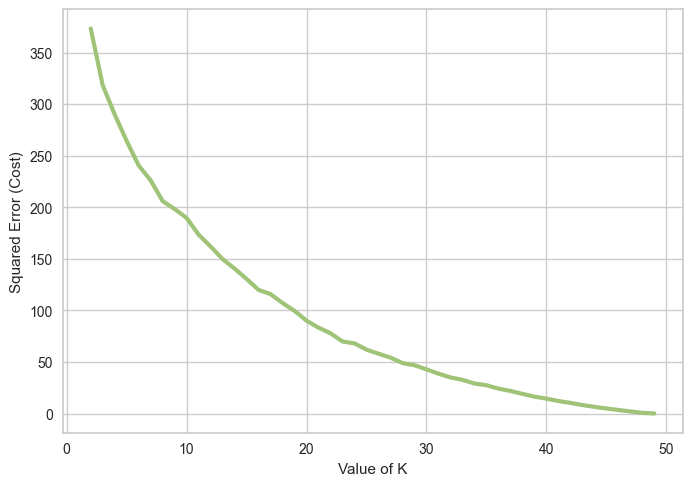

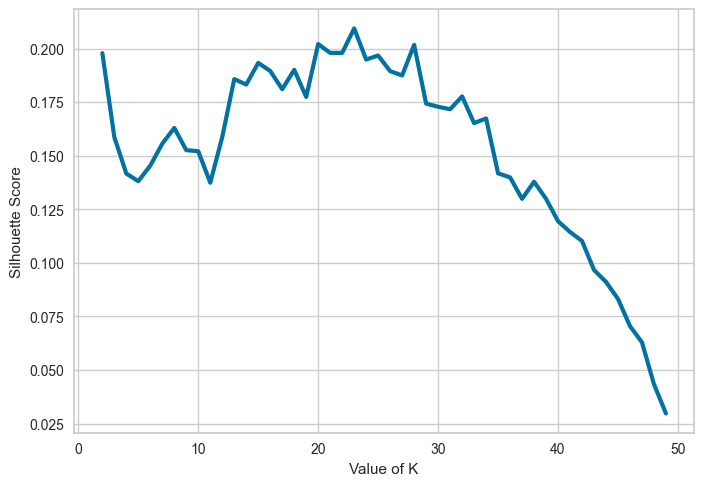

In [11]:
clustering(lifesnaps_personality, 50)

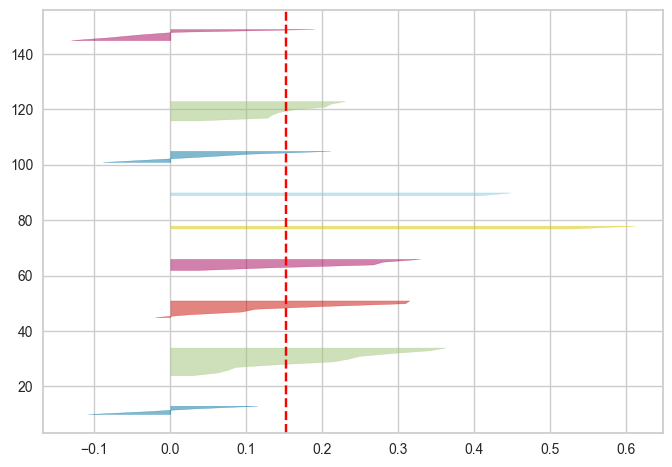

In [12]:
silhouette(lifesnaps_personality, 10)

In [13]:
kmeans = KMeans(n_clusters = 10, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(lifesnaps_personality)
y = pd.DataFrame(y, columns=["Cluster"])
y.value_counts()

Cluster
1          11
7           8
2           7
3           5
6           5
9           5
0           4
4           2
5           2
8           1
dtype: int64

In [14]:
#x=sklearn.decomposition.PCA(n_components = 2).fit_transform(lifesnaps_personality)
#plt.scatter(x[:,0], x[:,1], c=model.labels_, cmap='viridis')

####  Visualization with t-SNE

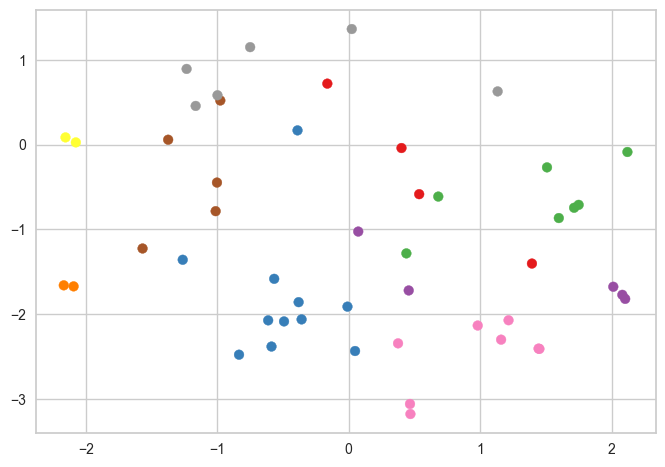

In [15]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters = 10, max_iter = 500, random_state = 0)
model = kmeans.fit(lifesnaps_personality)
tsne = TSNE().fit_transform(lifesnaps_personality)
#cmap = ListedColormap(['r', 'g', 'b'])
plt.scatter(x = tsne[:, 0], y = tsne[:, 1], c=model.labels_, cmap='Set1')

<AxesSubplot: xlabel='x', ylabel='y'>

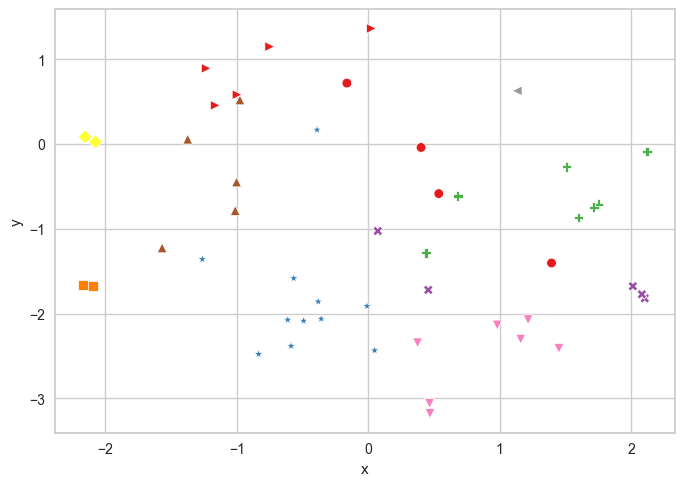

In [16]:
test = pd.concat([pd.DataFrame(tsne, columns=['x','y']),pd.DataFrame(model.labels_, columns=['c'])], axis=1)
mark = ["o", "*", "P", "X", "s", "D", "^", "v", "<", ">"]
sns.scatterplot(data=test, x="x", y="y",palette='Set1', hue="c", style='c', legend=False, markers = mark)

In [17]:
clusters = pd.concat([ids, y], axis=1)
clusters

,id,Cluster
0,621e2e8e67b776a24055b564,6
1,621e2eaf67b776a2406b14ac,2
2,621e2ed667b776a24085d8d1,3
3,621e2f3967b776a240c654db,1
4,621e2f6167b776a240e082a9,0
5,621e2f7a67b776a240f14425,1
6,621e2f9167b776a240011ccb,2
7,621e2fb367b776a24015accd,3
8,621e2fce67b776a240279baa,2
9,621e2ff067b776a2403eb737,2


In [18]:
# ADDED BY ME
lifesnaps_personality = pd.read_csv('scored_surveys/personality.csv')

lifesnaps_personality = lifesnaps_personality.drop(["Unnamed: 0", "submitdate"], axis = 1)
lifesnaps_personality = lifesnaps_personality.drop("type", axis = 1)
lifesnaps_personality.rename(columns={"user_id": "id"}, inplace=True)

In [19]:
lifesnaps_personality.columns

Index(['id', 'extraversion', 'agreeableness', 'conscientiousness', 'stability',
       'intellect', 'gender', 'ipip_extraversion_category',
       'ipip_agreeableness_category', 'ipip_conscientiousness_category',
       'ipip_stability_category', 'ipip_intellect_category'],
      dtype='object')

In [20]:
lifesnaps_statistics = pd.merge(lifesnaps_personality, clusters, on = "id")
lifesnaps_statistics = lifesnaps_statistics.drop("id", axis = 1)
#lifesnaps_statistics

In [21]:
lifesnaps_mean = lifesnaps_statistics.groupby('Cluster', as_index = False, group_keys = True).mean()
lifesnaps_mean

,Cluster,extraversion,agreeableness,conscientiousness,stability,intellect
0,0,37.000000,36.250000,29.250000,32.750000,29.500000
1,1,28.272727,37.363636,37.545455,35.727273,37.272727
2,2,31.285714,43.857143,32.571429,19.285714,36.285714
3,3,36.800000,41.000000,25.000000,29.000000,36.800000
4,4,20.000000,36.500000,42.500000,21.000000,45.500000
5,5,22.000000,31.000000,25.000000,27.500000,46.000000
6,6,21.200000,35.200000,38.800000,31.600000,35.400000
7,7,38.875000,45.375000,35.500000,35.500000,40.250000
8,8,41.000000,29.000000,33.000000,17.000000,30.000000
9,9,20.600000,28.600000,28.600000,26.400000,30.400000


In [22]:
lifesnaps_statistics.mean()

extraversion         30.14
agreeableness        38.28
conscientiousness    33.44
stability            29.84
intellect            36.60
Cluster               3.94
dtype: float64

In [23]:
lifesnaps_std = lifesnaps_statistics.groupby('Cluster', as_index = False, group_keys = True).std()
lifesnaps_std

,Cluster,extraversion,agreeableness,conscientiousness,stability,intellect
0,0,4.320494,5.251984,7.135592,5.619905,1.000000
1,1,4.100998,4.080998,4.251203,5.533370,3.408545
2,2,4.820591,1.772811,5.380742,5.089672,3.903600
3,3,2.387467,3.162278,3.391165,3.937004,3.033150
4,4,2.828427,0.707107,4.949747,4.242641,3.535534
5,5,0.000000,1.414214,1.414214,4.949747,0.000000
6,6,2.863564,4.324350,6.418723,7.197222,4.722288
7,7,5.330170,2.722263,4.898979,5.126960,3.412163
8,8,NaN,NaN,NaN,NaN,NaN
9,9,8.080842,5.983310,7.300685,9.581232,3.049590


In [24]:
lifesnaps_statistics.std()

extraversion         8.164158
agreeableness        6.353659
conscientiousness    6.916883
stability            8.182510
intellect            5.268311
Cluster              2.965172
dtype: float64

In [25]:
lifesnaps_statistics.groupby('Cluster')['gender'].value_counts().unstack(fill_value=0)

gender,FEMALE,MALE
Cluster,,
0,1,3
1,0,11
2,5,2
3,3,2
4,0,2
5,0,2
6,4,1
7,5,3
8,1,0


In [26]:
lifesnaps_statistics.groupby('Cluster')['ipip_extraversion_category'].value_counts().unstack(fill_value=0)

ipip_extraversion_category,AVERAGE,HIGH,LOW
Cluster,,,
0,1,3,0
1,8,2,1
2,5,1,1
3,2,3,0
4,0,0,2
5,0,0,2
6,0,0,5
7,2,6,0
8,0,1,0


In [27]:
lifesnaps_statistics.groupby('Cluster')['ipip_agreeableness_category'].value_counts().unstack(fill_value=0)

ipip_agreeableness_category,AVERAGE,HIGH,LOW
Cluster,,,
0,3,0,1
1,7,3,1
2,0,7,0
3,3,2,0
4,2,0,0
5,0,0,2
6,1,0,4
7,2,6,0
8,0,0,1


In [28]:
lifesnaps_statistics.groupby('Cluster')['ipip_conscientiousness_category'].value_counts().unstack(fill_value=0)

ipip_conscientiousness_category,AVERAGE,HIGH,LOW
Cluster,,,
0,1,1,2
1,3,7,1
2,5,1,1
3,0,0,5
4,0,2,0
5,0,0,2
6,0,4,1
7,5,3,0
8,1,0,0


In [29]:
lifesnaps_statistics.groupby('Cluster')['ipip_stability_category'].value_counts().unstack(fill_value=0)

ipip_stability_category,AVERAGE,HIGH,LOW
Cluster,,,
0,1,2,1
1,6,5,0
2,0,0,7
3,3,1,1
4,0,0,2
5,1,0,1
6,3,2,0
7,3,5,0
8,0,0,1


In [30]:
lifesnaps_statistics.groupby('Cluster')['ipip_intellect_category'].value_counts().unstack(fill_value=0)

ipip_intellect_category,AVERAGE,HIGH,LOW
Cluster,,,
0,0,0,4
1,9,1,1
2,2,3,2
3,3,2,0
4,0,2,0
5,0,2,0
6,3,1,1
7,3,5,0
8,0,0,1


In [31]:
lifesnaps_grouped_all = pd.merge(lifesnaps, clusters, on = "id")
lifesnaps_grouped_all

,ENTERTAINMENT,GYM,HOME,HOME1OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,age,bmi,...,week,week1cos,week1sin,weekday,weekday1cos,weekday1sin,year,dataset,stress,Cluster
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,22,-0.988831,-0.149042,4,-0.900969,-0.433884,2021,Train,1,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,23.0,...,29,-0.365341,-0.930874,1,0.623490,0.781831,2021,Train,0,1
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,23.0,...,24,-0.900969,-0.433884,1,0.623490,0.781831,2021,Train,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,27,-0.623490,-0.781831,0,1.000000,0.000000,2021,Train,0,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,...,25,-0.826239,-0.563320,4,-0.900969,-0.433884,2021,Train,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,27,-0.623490,-0.781831,6,0.623490,-0.781831,2021,Test,0,1
5142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,25,-0.826239,-0.563320,1,0.623490,0.781831,2021,Test,0,1
5143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,28,-0.500000,-0.866025,4,-0.900969,-0.433884,2021,Test,0,1
5144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,28,-0.500000,-0.866025,3,-0.900969,0.433884,2021,Test,0,1


In [32]:
lifesnaps_grouped_all.to_csv("Final_CSVs/lifesnaps_clusters_personality10.csv", index = False)

In [4]:
# ADDED BY ME
lifesnaps_grouped_all = pd.read_csv('Final_CSVs/lifesnaps_clusters_personality10.csv')

In [5]:
# Drop 'dataset' to run pycaret tests based on "Cluster".

lifesnaps_grouped_all = lifesnaps_grouped_all.drop('dataset', axis = 1)
lifesnaps_grouped_all

,ENTERTAINMENT,GYM,HOME,HOME1OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,age,bmi,...,very1active1minutes,week,week1cos,week1sin,weekday,weekday1cos,weekday1sin,year,stress,Cluster
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,20.0,22,-0.988831,-0.149042,4,-0.900969,-0.433884,2021,1,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,23.0,...,64.0,29,-0.365341,-0.930874,1,0.623490,0.781831,2021,0,1
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,23.0,...,76.0,24,-0.900969,-0.433884,1,0.623490,0.781831,2021,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,90.0,27,-0.623490,-0.781831,0,1.000000,0.000000,2021,0,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,...,29.0,25,-0.826239,-0.563320,4,-0.900969,-0.433884,2021,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,35.0,27,-0.623490,-0.781831,6,0.623490,-0.781831,2021,0,1
5142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,0.0,25,-0.826239,-0.563320,1,0.623490,0.781831,2021,0,1
5143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,42.0,28,-0.500000,-0.866025,4,-0.900969,-0.433884,2021,0,1
5144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,58.0,28,-0.500000,-0.866025,3,-0.900969,0.433884,2021,0,1


In [6]:
unique_participants = lifesnaps_grouped_all["Cluster"].unique()
personality_group = lifesnaps_grouped_all.groupby('Cluster')

In [7]:
lifesnaps_grouped_all[["id", "Cluster"]]

,id,Cluster
0,621e329067b776a2402ffad2,1
1,621e329067b776a2402ffad2,1
2,621e329067b776a2402ffad2,1
3,621e329067b776a2402ffad2,1
4,621e329067b776a2402ffad2,1
...,...,...
5141,621e301367b776a24057738e,1
5142,621e301367b776a24057738e,1
5143,621e301367b776a24057738e,1
5144,621e301367b776a24057738e,1


In [8]:
for participant in unique_participants:
    print("Group: ",participant)    
    part_df = personality_group.get_group(participant)

    unique_ids = part_df['id'].unique()
    print("Unique IDs:", unique_ids)

Group:  1
Unique IDs: ['621e329067b776a2402ffad2' '621e32d967b776a240627414'
 '621e366567b776a24076a727' '621e312a67b776a240164d59'
 '621e314867b776a24029ebf9' '621e36dd67b776a240ce9a45'
 '621e2f7a67b776a240f14425' '621e324e67b776a2400191cb'
 '621e2f3967b776a240c654db' '621e30f467b776a240f22944'
 '621e301367b776a24057738e']
Group:  7
Unique IDs: ['621e339967b776a240e502de' '621e310d67b776a24003096d'
 '621e34db67b776a240c9c2be' '621e33ed67b776a2401cf5f7'
 '621e36f967b776a240e5e7c9' '621e33b067b776a240f39e56'
 '621e323667b776a240f19134' '621e34f767b776a240de4e1a']
Group:  5
Unique IDs: ['621e332267b776a24092a584' '621e337667b776a240ce78ab']
Group:  0
Unique IDs: ['621e2f6167b776a240e082a9' '621e34ec67b776a240d60873'
 '621e328667b776a240281372' '621e36c267b776a240ba2756']
Group:  4
Unique IDs: ['621e333967b776a240a3cd06' '621e32af67b776a24045b4cf']
Group:  6
Unique IDs: ['621e2e8e67b776a24055b564' '621e335a67b776a240bb12ff'
 '621e331067b776a24085dd3f' '621e362467b776a2404ad513'
 '621e3569

In [12]:
for participant in unique_participants:
  print("Group: ", participant)
  part_df = personality_group.get_group(participant)

  # Count the number of rows for each ID using value_counts()
  id_counts = part_df['id'].value_counts()

  # Print the ID and its corresponding count
  print("ID Counts:")
  for id, count in id_counts.items():
    print(f"  ID: {id}, Count: {count}")

Group:  1
ID Counts:
  ID: 621e32d967b776a240627414, Count: 162
  ID: 621e36dd67b776a240ce9a45, Count: 133
  ID: 621e312a67b776a240164d59, Count: 109
  ID: 621e314867b776a24029ebf9, Count: 88
  ID: 621e2f7a67b776a240f14425, Count: 85
  ID: 621e30f467b776a240f22944, Count: 81
  ID: 621e324e67b776a2400191cb, Count: 76
  ID: 621e366567b776a24076a727, Count: 71
  ID: 621e329067b776a2402ffad2, Count: 70
  ID: 621e2f3967b776a240c654db, Count: 70
  ID: 621e301367b776a24057738e, Count: 64
Group:  7
ID Counts:
  ID: 621e34db67b776a240c9c2be, Count: 137
  ID: 621e310d67b776a24003096d, Count: 110
  ID: 621e36f967b776a240e5e7c9, Count: 98
  ID: 621e33ed67b776a2401cf5f7, Count: 88
  ID: 621e323667b776a240f19134, Count: 88
  ID: 621e33b067b776a240f39e56, Count: 73
  ID: 621e339967b776a240e502de, Count: 66
  ID: 621e34f767b776a240de4e1a, Count: 66
Group:  5
ID Counts:
  ID: 621e332267b776a24092a584, Count: 134
  ID: 621e337667b776a240ce78ab, Count: 114
Group:  0
ID Counts:
  ID: 621e34ec67b776a240d60

In [9]:
print(unique_participants)

[1 7 5 0 4 6 2 9 3 8]


In [10]:
def train_test_split_per_user(data, train_size=0.7):
    users = list(set(data.id))
    users = sorted(users, reverse=True)  # fix randomness
    total_users = len(users)
    slice = int(train_size * total_users)
    users_train = users[:slice]
    users_test = users[slice:]
    return data[data.id.isin(users_train)], data[data.id.isin(users_test)]

In [42]:
from sklearn.model_selection import train_test_split
import os  # Import os module for folder creation

# Specify folder name
folder_name = "LifeSnaps_Single_Attribute_Splitting_Output_Files"

accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Group: ",participant)
    part_df = personality_group.get_group(participant)

    # ----------------------------------------------------

    if participant in [0,4]: # ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 6
        continue

    if participant == 8:  # ValueError: Found array with 0 sample(s) (shape=(0, 60)) while a minimum of 1 is required by SimpleImputer.
        continue

    train_data, test_data = train_test_split_per_user(part_df)

    fold_groups = train_data.id

    test_ids = test_data['id']

    train_data = train_data.drop(columns=['id'])
    test_data = test_data.drop(columns=['id'])

    # -----------------------------------------------------

    part_df = part_df.drop('id', axis = 1)
    grid = setup(data=train_data, target='stress', fix_imbalance = True, html=False, verbose=False, test_data=test_data) #fix_imbalance = True,
    # grid = setup(data=train_data, target='stress', fix_imbalance = True, html=False, verbose=False, fold_strategy='groupkfold', fold=3, fold_groups=fold_groups, test_data=test_data) #fix_imbalance = True,

    best = compare_models(sort="F1")

    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])

    print(best)

    # ---------------------------------------------------

    # Make predictions using the best model
    predictions = predict_model(best, data=test_data)

    # Extract true labels (y_true), rename the column
    y_true = predictions[['stress']].rename(columns={'stress': 'y_true'})  # Rename using rename()

    # Extract predicted labels (y_pred), rename the column
    y_pred = predictions[['prediction_label']].rename(columns={'prediction_label': 'y_pred'})  # Rename using rename()

    # Identify protected attribute columns (assuming you know the column names)
    protected_attributes = predictions[['age', 'gender', 'bmi']]

    # Concatenate DataFrames containing predictions and protected attributes
    all_data = pd.concat([test_ids, y_true, y_pred, protected_attributes], axis=1)

    # Create filename
    filename = f"predictions_{participant}.csv"

    # Create folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)  # Create folder using makedirs()

    # Create full path with folder name
    filepath = os.path.join(folder_name, filename)

    # Save predictions
    all_data.to_csv(filepath, index=False)

    print(f"Predictions saved to: {filepath}")


Group:  1


                                    Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.8660  0.8198  0.5308  0.7493   
et                 Extra Trees Classifier    0.7940  0.8641  0.6385  0.5665   
lightgbm  Light Gradient Boosting Machine    0.8081  0.8696  0.5923  0.5913   
dt               Decision Tree Classifier    0.7983  0.7005  0.5462  0.5576   
ridge                    Ridge Classifier    0.7376  0.0000  0.6462  0.4493   
gbc          Gradient Boosting Classifier    0.7996  0.8484  0.5923  0.5192   
lda          Linear Discriminant Analysis    0.7390  0.7603  0.6538  0.4523   
ada                  Ada Boost Classifier    0.7659  0.7711  0.6154  0.4806   
rf               Random Forest Classifier    0.7940  0.8569  0.5692  0.5404   
knn                K Neighbors Classifier    0.6939  0.7222  0.6077  0.4069   
lr                    Logistic Regression    0.6544  0.6301  0.5846  0.3254   
nb                            Naive Bayes    0.7081 

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.8417  0.9262  0.7333  0.7350   
rf               Random Forest Classifier    0.8373  0.9266  0.7111  0.7579   
lightgbm  Light Gradient Boosting Machine    0.8286  0.9188  0.6667  0.7410   
gbc          Gradient Boosting Classifier    0.8287  0.9263  0.7000  0.7259   
ada                  Ada Boost Classifier    0.8331  0.8850  0.6444  0.7290   
dt               Decision Tree Classifier    0.8311  0.7393  0.5889  0.6828   
ridge                    Ridge Classifier    0.7790  0.0000  0.7556  0.5485   
lda          Linear Discriminant Analysis    0.7812  0.8812  0.7444  0.5457   
nb                            Naive Bayes    0.7139  0.8162  0.7667  0.4675   
lr                    Logistic Regression    0.7680  0.7584  0.6667  0.4792   
qda       Quadratic Discriminant Analysis    0.7966  0.8625  0.5111  0.5642   
knn                K Neighbors Classifier    0.7006 

                                    Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.7280  0.6653  0.5333  0.4917   
lda          Linear Discriminant Analysis    0.6750  0.7009  0.6000  0.4212   
knn                K Neighbors Classifier    0.6076  0.6412  0.6667  0.3870   
et                 Extra Trees Classifier    0.7182  0.8106  0.5000  0.4983   
ridge                    Ridge Classifier    0.6674  0.0000  0.6000  0.4095   
nb                            Naive Bayes    0.5106  0.5870  0.7667  0.3401   
gbc          Gradient Boosting Classifier    0.7197  0.8333  0.5000  0.4433   
lightgbm  Light Gradient Boosting Machine    0.7106  0.8199  0.5000  0.4417   
rf               Random Forest Classifier    0.6924  0.8236  0.4667  0.4845   
ada                  Ada Boost Classifier    0.7000  0.7704  0.4333  0.4467   
lr                    Logistic Regression    0.6015  0.5037  0.5000  0.3045   
svm                   SVM - Linear Kernel    0.4545 

                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.8538  0.9079  0.8214  0.7265   
et                 Extra Trees Classifier    0.8385  0.8960  0.7762  0.7125   
lightgbm  Light Gradient Boosting Machine    0.8346  0.8977  0.7595  0.7076   
dt               Decision Tree Classifier    0.8000  0.7595  0.6738  0.6857   
gbc          Gradient Boosting Classifier    0.7962  0.8927  0.7024  0.6635   
ada                  Ada Boost Classifier    0.7885  0.8547  0.6714  0.6638   
ridge                    Ridge Classifier    0.7308  0.0000  0.7619  0.5774   
lda          Linear Discriminant Analysis    0.7115  0.7643  0.7619  0.5682   
nb                            Naive Bayes    0.7615  0.6775  0.5595  0.5729   
lr                    Logistic Regression    0.6808  0.6373  0.6857  0.4010   
knn                K Neighbors Classifier    0.6308  0.6693  0.5881  0.3897   
qda       Quadratic Discriminant Analysis    0.7731 

                                    Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9335  0.9678  0.7167  0.7200   
gbc          Gradient Boosting Classifier    0.9273  0.9472  0.6917  0.5938   
dt               Decision Tree Classifier    0.9105  0.8024  0.6750  0.6500   
rf               Random Forest Classifier    0.9252  0.9529  0.6750  0.5595   
ada                  Ada Boost Classifier    0.9169  0.9082  0.6000  0.6333   
et                 Extra Trees Classifier    0.9314  0.9392  0.6083  0.5362   
ridge                    Ridge Classifier    0.8795  0.0000  0.6917  0.5317   
lda          Linear Discriminant Analysis    0.8753  0.8906  0.7167  0.5409   
nb                            Naive Bayes    0.8503  0.8890  0.7917  0.4771   
lr                    Logistic Regression    0.8174  0.7053  0.6917  0.3111   
knn                K Neighbors Classifier    0.7360  0.7529  0.7667  0.3215   
svm                   SVM - Linear Kernel    0.6668 

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9468  0.9800  0.8583  0.8632   
ridge                    Ridge Classifier    0.9005  0.0000  0.8917  0.7627   
rf               Random Forest Classifier    0.9421  0.9721  0.8250  0.7621   
lda          Linear Discriminant Analysis    0.8937  0.9194  0.8333  0.7319   
gbc          Gradient Boosting Classifier    0.9189  0.9427  0.7417  0.7512   
ada                  Ada Boost Classifier    0.9374  0.9711  0.7417  0.6667   
lightgbm  Light Gradient Boosting Machine    0.9399  0.9631  0.7417  0.6339   
nb                            Naive Bayes    0.8618  0.9362  0.8583  0.4830   
lr                    Logistic Regression    0.8218  0.8358  0.7667  0.5249   
dt               Decision Tree Classifier    0.8937  0.7221  0.5167  0.6480   
knn                K Neighbors Classifier    0.7530  0.7784  0.6500  0.2167   
svm                   SVM - Linear Kernel    0.3366 

                                    Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    0.8275  0.7389  0.6833  0.3966   
lda          Linear Discriminant Analysis    0.8138  0.7804  0.6667  0.3439   
gbc          Gradient Boosting Classifier    0.9036  0.8537  0.4000  0.4477   
ridge                    Ridge Classifier    0.8302  0.0000  0.5833  0.3308   
lr                    Logistic Regression    0.7936  0.7629  0.7000  0.2689   
rf               Random Forest Classifier    0.8992  0.8726  0.3000  0.3452   
ada                  Ada Boost Classifier    0.9035  0.8507  0.3333  0.2978   
dt               Decision Tree Classifier    0.8988  0.6098  0.2833  0.2600   
et                 Extra Trees Classifier    0.8967  0.8696  0.2500  0.2513   
lightgbm  Light Gradient Boosting Machine    0.8989  0.8823  0.2167  0.2133   
knn                K Neighbors Classifier    0.7490  0.5719  0.3667  0.0883   
svm                   SVM - Linear Kernel    0.3251 

In [43]:
from sklearn.model_selection import train_test_split
import os  # Import os module for folder creation

# Specify folder name
folder_name = "LifeSnaps_Single_Attribute_Splitting_Output_Files"

accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Group: ",participant)
    part_df = personality_group.get_group(participant)

    # ----------------------------------------------------    

    if participant != 4:
        continue
    
    if participant == 4:
        # Define number of IDs for train and test data (modify as needed)
        train_size = 1
        test_size = 1

    # Extract IDs and sort for clear separation
    unique_ids = sorted(part_df['id'].unique())

    # Get train and test data IDs
    train_ids = unique_ids[:train_size]
    test_ids = unique_ids[-test_size:]

    # Filter data based on IDs
    train_data = part_df[part_df['id'].isin(train_ids)]
    test_data = part_df[part_df['id'].isin(test_ids)]

    fold_groups = train_data.id

    test_ids = test_data['id']

    # print(len(test_data['id'].unique()))

    train_data = train_data.drop(columns=['id'])
    test_data = test_data.drop(columns=['id'])

    # -----------------------------------------------------

    part_df = part_df.drop('id', axis = 1)
    grid = setup(data=train_data, target='stress', fix_imbalance = True, html=False, verbose=False, test_data=test_data) #fix_imbalance = True,
    # grid = setup(data=train_data, target='stress', fix_imbalance = True, html=False, verbose=False, fold_strategy='groupkfold', fold=3, fold_groups=fold_groups, test_data=test_data) #fix_imbalance = True,

    best = compare_models(sort="F1")

    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])

    print(best)

    # ---------------------------------------------------

    # Make predictions using the best model
    predictions = predict_model(best, data=test_data)

    # Extract true labels (y_true), rename the column
    y_true = predictions[['stress']].rename(columns={'stress': 'y_true'})  # Rename using rename()

    # Extract predicted labels (y_pred), rename the column
    y_pred = predictions[['prediction_label']].rename(columns={'prediction_label': 'y_pred'})  # Rename using rename()

    # Identify protected attribute columns (assuming you know the column names)
    protected_attributes = predictions[['age', 'gender', 'bmi']]

    # Concatenate DataFrames containing predictions and protected attributes
    all_data = pd.concat([test_ids, y_true, y_pred, protected_attributes], axis=1)

    # Create filename
    filename = f"predictions_{participant}.csv"

    # Create folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)  # Create folder using makedirs()

    # Create full path with folder name
    filepath = os.path.join(folder_name, filename)

    # Save predictions
    all_data.to_csv(filepath, index=False)

    print(f"Predictions saved to: {filepath}")


Group:  1
Group:  7
Group:  5
Group:  0
Group:  4


                                    Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.8762  0.4000  1.0000  0.8762   
et                 Extra Trees Classifier    0.8762  0.4833  1.0000  0.8762   
rf               Random Forest Classifier    0.8143  0.3200  0.9333  0.8714   
ada                  Ada Boost Classifier    0.7929  0.4267  0.8767  0.8957   
lightgbm  Light Gradient Boosting Machine    0.7810  0.2333  0.8967  0.8681   
gbc          Gradient Boosting Classifier    0.7690  0.3467  0.8800  0.8624   
ridge                    Ridge Classifier    0.7071  0.0000  0.7733  0.8867   
knn                K Neighbors Classifier    0.7024  0.4050  0.7267  0.8883   
dt               Decision Tree Classifier    0.6381  0.3917  0.7000  0.8757   
nb                            Naive Bayes    0.6238  0.4967  0.6500  0.9233   
lda          Linear Discriminant Analysis    0.5643  0.3717  0.6133  0.8483   
svm                   SVM - Linear Kernel    0.6667 

In [44]:
from sklearn.model_selection import train_test_split
import os  # Import os module for folder creation

# Specify folder name
folder_name = "LifeSnaps_Single_Attribute_Splitting_Output_Files"

accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Group: ",participant)
    part_df = personality_group.get_group(participant)

    # ----------------------------------------------------

    if participant != 0:
        continue

    train_data, test_data = train_test_split(part_df)

    fold_groups = train_data.id

    test_ids = test_data['id']

    train_data = train_data.drop(columns=['id'])
    test_data = test_data.drop(columns=['id'])

    # -----------------------------------------------------

    part_df = part_df.drop('id', axis = 1)
    grid = setup(data=train_data, target='stress', fix_imbalance = True, html=False, verbose=False, test_data=test_data) #fix_imbalance = True,
    # grid = setup(data=train_data, target='stress', fix_imbalance = True, html=False, verbose=False, fold_strategy='groupkfold', fold=3, fold_groups=fold_groups, test_data=test_data) #fix_imbalance = True,

    best = compare_models(sort="F1")

    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])

    print(best)

    # ---------------------------------------------------

    # Make predictions using the best model
    predictions = predict_model(best, data=test_data)

    # Extract true labels (y_true), rename the column
    y_true = predictions[['stress']].rename(columns={'stress': 'y_true'})  # Rename using rename()

    # Extract predicted labels (y_pred), rename the column
    y_pred = predictions[['prediction_label']].rename(columns={'prediction_label': 'y_pred'})  # Rename using rename()

    # Identify protected attribute columns (assuming you know the column names)
    protected_attributes = predictions[['age', 'gender', 'bmi']]

    # Concatenate DataFrames containing predictions and protected attributes
    all_data = pd.concat([test_ids, y_true, y_pred, protected_attributes], axis=1)

    # Create filename
    filename = f"predictions_{participant}.csv"

    # Create folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)  # Create folder using makedirs()

    # Create full path with folder name
    filepath = os.path.join(folder_name, filename)

    # Save predictions
    all_data.to_csv(filepath, index=False)

    print(f"Predictions saved to: {filepath}")


Group:  1
Group:  7
Group:  5
Group:  0


                                    Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.9560  0.7868    0.60  0.6333   
lightgbm  Light Gradient Boosting Machine    0.9560  0.9688    0.55  0.6500   
ada                  Ada Boost Classifier    0.9499  0.9438    0.60  0.5833   
gbc          Gradient Boosting Classifier    0.9404  0.9427    0.60  0.4833   
et                 Extra Trees Classifier    0.9497  0.9696    0.50  0.4417   
rf               Random Forest Classifier    0.9372  0.9647    0.40  0.3083   
nb                            Naive Bayes    0.8493  0.8634    0.60  0.2810   
ridge                    Ridge Classifier    0.8839  0.0000    0.50  0.2694   
lr                    Logistic Regression    0.8145  0.7056    0.50  0.2060   
lda          Linear Discriminant Analysis    0.8839  0.7192    0.40  0.2278   
knn                K Neighbors Classifier    0.7834  0.7100    0.45  0.1411   
svm                   SVM - Linear Kernel    0.5845 

In [45]:
mean_acc = statistics.mean(accuracies)
mean_prec = statistics.mean(precision)
mean_rec = statistics.mean(recall)
mean_f1 = statistics.mean(f1scores)

In [46]:
print("Mean Accuracy Lifesnaps - Cluster Personality: ", mean_acc)
print("Mean Precision Lifesnaps- Cluster Personality: ", mean_prec)
print("Mean Recall Lifesnaps- Cluster Personality: ", mean_rec)
print("Mean F1-score Lifesnaps- Cluster Personality: ", mean_f1)

Mean Accuracy Lifesnaps - Cluster Personality:  0.956
Mean Precision Lifesnaps- Cluster Personality:  0.6333
Mean Recall Lifesnaps- Cluster Personality:  0.6
Mean F1-score Lifesnaps- Cluster Personality:  0.5667


In [47]:
print(unique_participants)

[1 7 5 0 4 6 2 9 3 8]


In [48]:
import os  # Import os module for folder creation

# Specify folder name
folder_name = "LifeSnaps_Single_Attribute_Splitting_Output_Files"

for participant in unique_participants:
    print("Group: ",participant)
    part_df = personality_group.get_group(participant)

    # ----------------------------------------------------

    # if participant in [0, 4, 8]:
    if participant == 8:
        # train_data, test_data = train_test_split_per_user(part_df)
        train_data, test_data = train_test_split_per_user(part_df)

        test_ids = test_data['id']

        # Extracting necessary columns from test_data
        extracted_data = test_data[['id', 'age', 'gender', 'bmi', 'stress']]

        # Renaming 'stress' column to 'y_true'
        extracted_data = extracted_data.rename(columns={'stress': 'y_true'})

        # Creating a NaN 'y_pred' column
        extracted_data['y_pred'] = np.nan

        # Reordering columns
        extracted_data = extracted_data[['id', 'y_true', 'y_pred', 'age', 'gender', 'bmi']]

        # Create filename
        filename = f"predictions_{participant}.csv"

        # Create folder if it doesn't exist
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)  # Create folder using makedirs()

        # Create full path with folder name
        filepath = os.path.join(folder_name, filename)

        # Save predictions
        extracted_data.to_csv(filepath, index=False)

        print(f"Predictions saved to: {filepath}")



Group:  1
Group:  7
Group:  5
Group:  0
Group:  4
Group:  6
Group:  2
Group:  9
Group:  3
Group:  8
Predictions saved to: LifeSnaps_Single_Attribute_Splitting_Output_Files\predictions_8.csv


In [49]:
folder_path = "LifeSnaps_Single_Attribute_Splitting_Output_Files"

# List all CSV files in the folder:
csv_files = []
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        csv_files.append(os.path.join(folder_path, filename))

# Concatenate files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)


In [50]:
output_folder = "Output_Files"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)  # Create folder using makedirs()

# Create the full path with the output folder name
output_filepath = os.path.join(output_folder, "LifeSnaps_Single_Attribute_Splitting.csv")

# Save the concatenated DataFrame to the new CSV file
combined_df.to_csv(output_filepath, index=False)

print(f"All predictions saved to: {output_filepath}")

All predictions saved to: Output_Files\LifeSnaps_Single_Attribute_Splitting.csv


In [51]:
predictions = pd.read_csv('Output_Files/LifeSnaps_Single_Attribute_Splitting.csv')

In [52]:
predictions['bmi'] = predictions.bmi.apply(lambda bmi: 0 if bmi < 18.5 else (1 if bmi < 25 else (
    2 if bmi < 30 else 3)))  # 0: Underweight, 1: Normal, 2: Overweight, 3: Obese

In [53]:
predictions.to_csv('Output_Files/LifeSnaps_Single_Attribute_Splitting.csv', index=False)